# Dataset and EDA:

In [1]:
#setup
import gzip
from collections import defaultdict
import math
import numpy as np
import string
import random
from sklearn import linear_model
from matplotlib import pyplot
import random

Dataset:


In [202]:
#importing data
dataset = []
z = gzip.open("goodreads_reviews_mystery_thriller_crime.json.gz")
for l in z.readlines():
    dataset.append(eval(l))
    if len(dataset) == 150000:
        break
random.seed(1)        
random.shuffle(dataset)

In [204]:
#example data point
dataset[0]

{'user_id': '5a3c16d092f0c0f4fc8bd417af52e71a',
 'book_id': '21337',
 'review_id': '9227bb2d9166503d2f9e45ce230a8088',
 'rating': 2,
 'review_text': "I bought this book after my uncle (another Koontz fan) accidently bought the third book in the series and I read it. I found the novel a good fun read, but it didn't live up to his earlier works for me. I feel like Koontz could have added some scenes and explanations. I had mixed feelings over the short chapters. At times when I was bored by a character it was good but when I was engrossed with a character or moment I felt like an annoying commercial was interrupting my fun.",
 'date_added': 'Mon Oct 05 23:10:03 -0700 2009',
 'date_updated': 'Mon Oct 05 23:14:25 -0700 2009',
 'read_at': '',
 'started_at': '',
 'n_votes': 0,
 'n_comments': 0}

In [154]:
length = len(dataset)
length

150000

In [388]:
#utility structures
train = dataset[:50000]
valid = dataset[50000:100000]
test = dataset[100000:]

ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)
for d in train:
    u = d['user_id']
    b = d['book_id']
    r = d['rating']
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))

In [161]:
ratingsPerUser

defaultdict(list,
            {'5a3c16d092f0c0f4fc8bd417af52e71a': [('21337', 2),
              ('14995', 4),
              ('6411961', 3),
              ('182425', 4),
              ('13128', 3),
              ('2029927', 3)],
             '48fa2d1f1a5cd37af85146ceaf2a1738': [('10692829', 5),
              ('13543005', 4),
              ('10503124', 5)],
             '1b44d9fb30f17a5d05ca58ea0b78481d': [('23481139', 3),
              ('30294915', 4),
              ('22465597', 2),
              ('25412978', 5),
              ('29586452', 5),
              ('34330333', 2),
              ('34451708', 4),
              ('22557272', 3),
              ('31216812', 5),
              ('22609453', 3),
              ('35225380', 5),
              ('12368985', 1)],
             'ab2fadb5c7bbe55c80406d2b3692e969': [('27276220', 4),
              ('13114564', 2),
              ('18453110', 3),
              ('26050845', 4),
              ('13154447', 3),
              ('24036082', 4),
           

In [ ]:
#overlap in users

In [280]:
trainUsers = set([d['user_id'] for d in train])
validUsers = set([d['user_id'] for d in valid])
testUsers = set([d['user_id'] for d in test])

In [281]:
len(trainUsers.intersection(validUsers))

6398

In [282]:
len(trainUsers.intersection(testUsers))

6406

In [ ]:
#overlap in items

In [405]:
trainItems = set([d['book_id'] for d in train])
validItems = set([d['book_id'] for d in valid])
testItems = set([d['book_id'] for d in test])

In [406]:
len(trainItems.intersection(validItems))

9695

In [407]:
len(trainItems.intersection(testItems))

9727

345


(array([2.5811e+04, 1.0400e+02, 2.4000e+01, 1.3000e+01, 5.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  18.2,  35.4,  52.6,  69.8,  87. , 104.2, 121.4, 138.6,
        155.8, 173. , 190.2, 207.4, 224.6, 241.8, 259. , 276.2, 293.4,
        310.6, 327.8, 345. ]),
 <BarContainer object of 20 artists>)

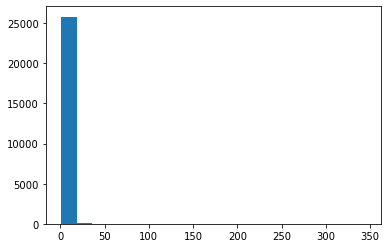

In [162]:
#number of reviews per item
ratings_per_item = [len(v) for k,v in ratingsPerItem.items()]
print(max(ratings_per_item))
pyplot.hist(ratings_per_item, bins=20)

309


(array([8.564e+03, 3.270e+02, 1.190e+02, 4.800e+01, 2.700e+01, 2.100e+01,
        8.000e+00, 1.100e+01, 7.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. , 170.4, 185.8, 201.2, 216.6, 232. , 247.4, 262.8,
        278.2, 293.6, 309. ]),
 <BarContainer object of 20 artists>)

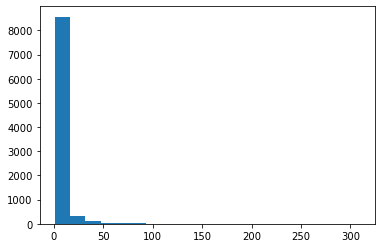

In [163]:
#number of ratings per user
ratings_per_user = [len(v) for k,v in ratingsPerUser.items()]
print(max(ratings_per_user))
pyplot.hist(ratings_per_user, bins=20)

(array([ 1450.,     0.,  1426.,     0.,  3977.,     0., 11758.,     0.,
        17947.,     0., 13442.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

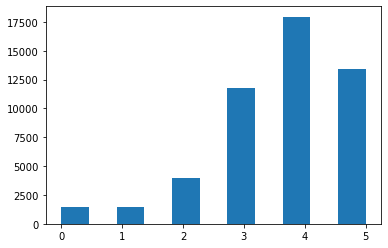

In [159]:
#ratings
ratings = [d['rating'] for d in train]
pyplot.hist(ratings, bins=11)

12861


(array([2.9819e+04, 9.2480e+03, 4.4490e+03, 2.5180e+03, 1.5080e+03,
        8.2200e+02, 5.6500e+02, 3.5500e+02, 2.2800e+02, 1.2400e+02,
        1.1600e+02, 4.3000e+01, 4.9000e+01, 2.4000e+01, 2.2000e+01,
        2.0000e+01, 1.2000e+01, 1.6000e+01, 9.0000e+00, 1.7000e+01,
        6.0000e+00, 6.0000e+00, 7.0000e+00, 4.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([    0. ,   428.7,   857.4,  1286.1,  1714.8,  2143.5,  2572.2,
         3000.9,  3429.6,  3858.3,  4287. ,  4715.7,  5144.4,  5573.1,
         6001.8,  6430.5,  6859.2,  7287.9,  7716.6,  8145.3,  8574. ,
         9002.7,  9431.4,  9860.1, 10288.8, 10717.5, 11146.2, 11574.9,
        12003.6, 12432.3, 12861. ]),
 <BarContainer object of 30 artists>)

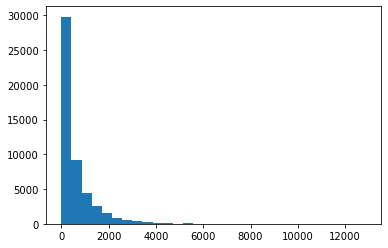

In [164]:
#review lengths
review_lengths = [len(d['review_text']) for d in train]
print(max(review_lengths))
pyplot.hist(review_lengths, bins=30)

In [166]:
#1000 most common unigrams
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in train:
  r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
  for w in r.split():
    wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [167]:
words = [x[1] for x in counts[:1000]]

In [168]:
words

['the',
 'and',
 'a',
 'to',
 'i',
 'of',
 'is',
 'in',
 'it',
 'this',
 'was',
 'that',
 'book',
 'but',
 'for',
 'with',
 'as',
 'her',
 'read',
 'not',
 'on',
 'you',
 'one',
 'story',
 'be',
 'have',
 'are',
 'his',
 'me',
 'so',
 'she',
 'he',
 'an',
 'at',
 'my',
 'all',
 'from',
 'more',
 'like',
 'about',
 'what',
 'just',
 'who',
 'out',
 'by',
 'characters',
 'really',
 'there',
 'has',
 'up',
 'its',
 'series',
 'good',
 'they',
 'or',
 'when',
 'had',
 'if',
 'very',
 'will',
 'would',
 'some',
 'first',
 'books',
 'were',
 'mystery',
 'how',
 'much',
 'reading',
 'into',
 'time',
 'well',
 'get',
 'love',
 'their',
 'novel',
 'because',
 'did',
 'which',
 'no',
 'great',
 'way',
 'can',
 'even',
 'them',
 'end',
 'than',
 'also',
 'didnt',
 'do',
 'other',
 'too',
 'been',
 'character',
 'author',
 'im',
 'know',
 'little',
 'think',
 'plot',
 'him',
 'only',
 'could',
 'dont',
 'we',
 'life',
 'after',
 'see',
 'then',
 'many',
 'enjoyed',
 'interesting',
 'still',
 'find

In [169]:
#1000 most common N-grams (N=1 to N=5)
wordCountNgram = defaultdict(int)
punctuation = set(string.punctuation)
for d in train:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    ws4 = [' '.join(x) for x in list(zip(ws[:-3],ws[1:-2],ws[2:-1],ws[3:]))]
    ws5 = [' '.join(x) for x in list(zip(ws[:-4],ws[1:-3],ws[2:-2],ws[3:-1],ws[4:]))]
    for w in ws + ws2 + ws3 + ws4 + ws5:
        wordCountNgram[w] += 1

countsNgram = [(wordCountNgram[w], w) for w in wordCountNgram]
countsNgram.sort()
countsNgram.reverse()

In [170]:
wordsNgram = [x[1] for x in countsNgram[:1000]]

In [171]:
wordsNgram

['the',
 'and',
 'a',
 'to',
 'i',
 'of',
 'is',
 'in',
 'it',
 'this',
 'was',
 'that',
 'book',
 'but',
 'for',
 'with',
 'as',
 'her',
 'of the',
 'read',
 'not',
 'on',
 'you',
 'one',
 'story',
 'in the',
 'be',
 'have',
 'are',
 'his',
 'me',
 'so',
 'she',
 'this book',
 'he',
 'an',
 'at',
 'my',
 'all',
 'from',
 'more',
 'like',
 'about',
 'what',
 'just',
 'who',
 'out',
 'by',
 'characters',
 'really',
 'there',
 'has',
 'up',
 'its',
 'series',
 'good',
 'they',
 'or',
 'when',
 'and the',
 'had',
 'if',
 'very',
 'the book',
 'is a',
 'will',
 'to the',
 'would',
 'some',
 'it was',
 'first',
 'books',
 'the story',
 'were',
 'mystery',
 'how',
 'much',
 'reading',
 'into',
 'i was',
 'time',
 'well',
 'to be',
 'get',
 'love',
 'their',
 'novel',
 'because',
 'did',
 'which',
 'this is',
 'no',
 'great',
 'way',
 'and i',
 'can',
 'even',
 'them',
 'end',
 'than',
 'also',
 'was a',
 'didnt',
 'do',
 'other',
 'too',
 'been',
 'character',
 'author',
 'im',
 'know',
 'li

In [207]:
#global average rating and user average ratings
allRatings = []
userRatings = defaultdict(list)

for d in train:
    r = int(d['rating'])
    allRatings.append(r)
    userRatings[d['user_id']].append(r)

globalAverage = sum(allRatings) / len(allRatings)
userAverage = {}
for u in userRatings:
    userAverage[u] = sum(userRatings[u]) / len(userRatings[u])

In [208]:
globalAverage

3.67304

In [ ]:
{k: userAverage[k] for k in list(userAverage)[:10]}

(array([1.510e+02, 1.000e+00, 1.000e+00, 0.000e+00, 2.040e+02, 4.000e+00,
        4.200e+01, 1.400e+01, 4.490e+02, 7.800e+01, 2.960e+02, 1.110e+02,
        1.386e+03, 5.050e+02, 8.490e+02, 3.370e+02, 2.067e+03, 3.650e+02,
        5.760e+02, 1.712e+03]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

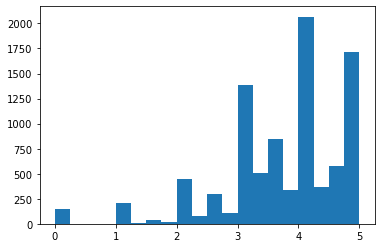

In [184]:
#user rating averages
user_averages = [v for k,v in userAverage.items()]
pyplot.hist(user_averages, bins=20)

# Model

In [185]:
#mean squared error function
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [243]:
#baseline function
def baseline(datum):
    u = datum['user_id']
    if u in userAverage:
        return userAverage[u]
    else:
        return globalAverage

In [244]:
baseline_predictions = [baseline(d) for d in test]

In [245]:
ytest = [d['rating'] for d in test]

In [246]:
MSE(baseline_predictions, ytest)

1.2575837403396357

In [247]:
baseline_predictions = [baseline(d) for d in train]
ytest = [d['rating'] for d in train]
MSE(baseline_predictions, ytrain)

0.8104417387734227

In [215]:
#unigram setup
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [216]:
#unigram feature function
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) # offset
    return feat

In [217]:
Xtrain = [feature(d) for d in train]
ytrain = [d['rating'] for d in train]
Xvalid = [feature(d) for d in valid]
yvalid = [d['rating'] for d in valid]
Xtest = [feature(d) for d in test]
ytest = [d['rating'] for d in test]

In [218]:
#tuning
for lbda in [277, 278, 279, 280]:
    clf = linear_model.Ridge(lbda, fit_intercept=False)
    clf.fit(Xtrain, ytrain)
    theta = clf.coef_
    predictions = clf.predict(Xvalid)
    print(MSE(predictions, yvalid))

1.1546604538213472
1.1546603311274695
1.1546603059368317
1.1546603778976887


In [219]:
clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.1825647038642462

In [220]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

1.1189666753451621

In [ ]:
#combination of baseline and unigrams

In [221]:
Xtrain = [[baseline(d)]+feature(d) for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [[baseline(d)]+feature(d) for d in test]
ytest = [d['rating'] for d in test]

clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.0744193819118182

In [222]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

0.6879786355970942

In [223]:
#N-gram setup
wordIdNgram = dict(zip(wordsNgram, range(len(wordsNgram))))
wordSetNgram = set(wordsNgram)

In [224]:
#ngram feature function
def featureNgram(datum):
    feat = [0]*len(wordsNgram)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    ws4 = [' '.join(x) for x in list(zip(ws[:-3],ws[1:-2],ws[2:-1],ws[3:]))]
    ws5 = [' '.join(x) for x in list(zip(ws[:-4],ws[1:-3],ws[2:-2],ws[3:-1],ws[4:]))]
    for w in ws + ws2 + ws3 + ws4 + ws5:
        if w in wordsNgram:
            feat[wordIdNgram[w]] += 1
    feat.append(1) #offset
    return feat

In [225]:
#ngrams
Xtrain = [featureNgram(d) for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [featureNgram(d) for d in test]
ytest = [d['rating'] for d in test]

clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)

In [226]:
MSE(predictions, ytest)

1.1912197999312892

In [227]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

1.1278368575115965

In [228]:
#document frequencies
df = defaultdict(int)
for d in train:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    for w in set(r.split()):
        if w in words:
            df[w] += 1

In [229]:
df

defaultdict(int,
            {'series': 9710,
             'feel': 3246,
             'book': 24462,
             'moment': 719,
             'up': 9943,
             'some': 8011,
             'with': 18835,
             'chapters': 1033,
             'third': 1130,
             'to': 31049,
             'when': 8395,
             'annoying': 561,
             'a': 34407,
             'i': 31872,
             'fun': 3328,
             'character': 5942,
             'or': 8079,
             'it': 26459,
             'but': 22191,
             'times': 2810,
             'feelings': 560,
             'short': 1819,
             'in': 26454,
             'had': 8485,
             'added': 597,
             'fan': 1455,
             'didnt': 5893,
             'the': 37559,
             'over': 3526,
             'live': 977,
             'like': 11551,
             'felt': 3205,
             'read': 19266,
             'his': 8965,
             'works': 1197,
             'an': 12435,
 

In [230]:
#TFIDF common words feature function
def featureTFIDF(datum):
    tf = defaultdict(int)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            tf[w] += 1

    tfidf = dict(zip(words,[tf[w] * math.log2(len(train) / df[w]) for w in words]))
    
    feat = [0]*len(words)
    for w in words:
        feat[wordId[w]] = tfidf[w]
    feat.append(1) # offset
    return feat

In [231]:
Xtrain = [featureTFIDF(d) for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [featureTFIDF(d) for d in test]
ytest = [d['rating'] for d in test]

In [232]:
Xvalid = [featureTFIDF(d) for d in valid]
yvalid = [d['rating'] for d in valid]

In [233]:
#tuning
for lbda in [0, .001, .01]:
    clf = linear_model.Ridge(lbda, fit_intercept=False)
    clf.fit(Xtrain, ytrain)
    theta = clf.coef_
    predictions = clf.predict(Xvalid)
    print(MSE(predictions, yvalid))

1.160472808787545
1.160472809240444
1.1604728133176498


In [234]:
clf = linear_model.Ridge(1, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.1874238490024038

In [235]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

1.1143311830942464

In [386]:
#combination of baseline, B-O-W unigrams, and TF-IDF unigrams
Xtrain = [[baseline(d)]+feature(d)+featureTFIDF(d) for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [[baseline(d)]+feature(d)+featureTFIDF(d) for d in test]
ytest = [d['rating'] for d in test]

clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.0710467720959334

In [387]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

0.6860890873721138

In [ ]:
ratings_per_item = [len(v) for k,v in ratingsPerItem.items()]

In [389]:
len(ratingsPerItem)

25969

In [395]:
popularity_per_item = {k: len(v)/len(ratingsPerUser) for k,v in ratingsPerItem.items()}

In [396]:
popularity_per_item

{'21337': 0.00043725404459991256,
 '10692829': 0.00032794053344993443,
 '23481139': 0.00021862702229995628,
 '27276220': 0.00010931351114997814,
 '66559': 0.013117621337997376,
 '17206654': 0.00010931351114997814,
 '15697889': 0.00032794053344993443,
 '11296252': 0.00010931351114997814,
 '160008': 0.00010931351114997814,
 '213473': 0.00021862702229995628,
 '25194146': 0.0010931351114997813,
 '15776309': 0.004591167468299082,
 '29498819': 0.00010931351114997814,
 '237181': 0.00010931351114997814,
 '25817395': 0.0005465675557498906,
 '22236161': 0.000765194578049847,
 '14739522': 0.00010931351114997814,
 '8442457': 0.034324442501093136,
 '22597466': 0.00010931351114997814,
 '8937186': 0.00010931351114997814,
 '724223': 0.00010931351114997814,
 '3281831': 0.00010931351114997814,
 '23125905': 0.00010931351114997814,
 '25365': 0.0008745080891998251,
 '66370': 0.00032794053344993443,
 '11297434': 0.0006558810668998689,
 '1776552': 0.00010931351114997814,
 '1215920': 0.00021862702229995628,
 

In [404]:
avg_popularity = sum(popularity_per_item.values())/len(popularity_per_item.values())
avg_popularity

0.00021046923476053097

In [408]:
max(popularity_per_item.values())

0.037713161346742456

In [409]:
min(popularity_per_item.values())

0.00010931351114997814

In [401]:
#popularity feature
def popularity(datum):
    b = datum['book_id']
    if b in popularity_per_item:
        return popularity_per_item[b]
    else:
        return avg_popularity

In [403]:
popularity(test[0])

0.00021046923476053097

In [417]:
rate_proportion = {}
for k,v in ratingsPerItem.items():
    ratings = [r[1] for r in v]
    rate_proportion[k] = [ratings.count(x)/len(v) for x in [1, 2, 3, 4, 5]]

In [445]:
rate_proportion

{'21337': [0.0, 0.25, 0.25, 0.25, 0.0],
 '10692829': [0.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333],
 '23481139': [0.0, 0.0, 0.5, 0.0, 0.5],
 '27276220': [0.0, 0.0, 0.0, 1.0, 0.0],
 '66559': [0.0,
  0.058333333333333334,
  0.3,
  0.39166666666666666,
  0.24166666666666667],
 '17206654': [0.0, 0.0, 0.0, 1.0, 0.0],
 '15697889': [0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0],
 '11296252': [0.0, 0.0, 0.0, 1.0, 0.0],
 '160008': [0.0, 0.0, 1.0, 0.0, 0.0],
 '213473': [0.0, 0.0, 0.0, 1.0, 0.0],
 '25194146': [0.0, 0.1, 0.3, 0.4, 0.2],
 '15776309': [0.07142857142857142,
  0.09523809523809523,
  0.35714285714285715,
  0.2857142857142857,
  0.16666666666666666],
 '29498819': [0.0, 0.0, 0.0, 1.0, 0.0],
 '237181': [1.0, 0.0, 0.0, 0.0, 0.0],
 '25817395': [0.0, 0.0, 0.2, 0.6, 0.2],
 '22236161': [0.0,
  0.0,
  0.14285714285714285,
  0.2857142857142857,
  0.5714285714285714],
 '14739522': [0.0, 0.0, 1.0, 0.0, 0.0],
 '8442457': [0.03503184713375796,
  0.07006369426751592,
  0.2101910828

In [419]:
avg_rps = [0, 0, 0, 0, 0]
for rp in rate_proportion.values():
    for i in range(5):
        avg_rps[i] += rp[i]
avg_rps = [rp/len(rate_proportion) for rp in avg_rps]

In [420]:
avg_rps

[0.0266266945023413,
 0.07769754144393254,
 0.23619830796537114,
 0.3559163569826364,
 0.26969237884769864]

In [429]:
#star rating proportion feature
def stars(datum):
    u = datum['user_id']
    b = datum['book_id']
    if b not in ratingsPerItem or ratingsPerItem[b][0][0] == u:
        return avg_rps
    ratings = [r[1] for r in ratingsPerItem[b] if r[0] != u]
    return [ratings.count(x)/len(ratings) for x in [1, 2, 3, 4, 5]]

In [430]:
stars(train[0])

[0.0266266945023413,
 0.07769754144393254,
 0.23619830796537114,
 0.3559163569826364,
 0.26969237884769864]

In [431]:
stars(test[0])

[0.0266266945023413,
 0.07769754144393254,
 0.23619830796537114,
 0.3559163569826364,
 0.26969237884769864]

In [443]:
#combination of baseline, B-O-W unigrams, TF-IDF unigrams, and popularity
Xtrain = [[baseline(d)]+feature(d)+featureTFIDF(d)+[popularity(d)] for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [[baseline(d)]+feature(d)+featureTFIDF(d)+[popularity(d)] for d in test]
ytest = [d['rating'] for d in test]

clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.0710408231922557

In [444]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

0.6860839113640871

In [439]:
#combination of baseline, B-O-W unigrams, TF-IDF unigrams, and star rating proportions
Xtrain = [[baseline(d)]+feature(d)+featureTFIDF(d)+stars(d) for d in train]
ytrain = [d['rating'] for d in train]
Xtest = [[baseline(d)]+feature(d)+featureTFIDF(d)+stars(d) for d in test]
ytest = [d['rating'] for d in test]

clf = linear_model.Ridge(279, fit_intercept=False)
clf.fit(Xtrain, ytrain)
theta = clf.coef_
predictions = clf.predict(Xtest)
MSE(predictions, ytest)

1.0650649468919948

In [440]:
predictions = clf.predict(Xtrain)
MSE(predictions, ytrain)

0.6840058485220541

In [253]:
#cosine similarity
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [270]:
#tfidf vectors
tfidfs = {}
for rev in train:
    tf = defaultdict(int)
    r = ''.join([c for c in rev['review_text'].lower() if not c in punctuation])
    for w in r.split():
        tf[w] += 1
    tfidf = dict(zip(words[:10],[tf[w] * math.log2(len(train) / df[w]) for w in words[:10]]))
        
    tfidfs[rev['review_id']] = list(tfidf.values()) + [rev['rating']]

In [272]:
#heuristic 1 function
def h1(datum):
    rating = 0
    sim = 0
    
    tf = defaultdict(int)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    for w in r.split():
        tf[w] += 1
    tfidf = dict(zip(words[:10],[tf[w] * math.log2(len(train) / df[w]) for w in words[:10]]))
    x1 = list(tfidf.values())
    
    for rev in tfidfs:
        if rev == datum['review_id']:
            continue
        tfidf_rev = tfidfs[rev]
        x2 = tfidf_rev[:-1]
        s = Cosine(x1, x2)
        if s > sim:
            sim = s
            rating = tfidf_rev[-1]
    return rating

In [273]:
h1(test[0])

4

In [274]:
predictions = [h1(d) for d in test]
ytest = [d['rating'] for d in test]
MSE(predictions, ytest)

3.61

In [283]:
predictions = [h1(d) for d in train]
ytest = [d['rating'] for d in train]
MSE(predictions, ytrain)

3.5274

In [238]:
#jaccard similarity
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [239]:
itemAverages = defaultdict(list)
ratingMean = []

for d in train:
    itemAverages[d['book_id']].append(d['rating'])
    ratingMean.append(d['rating'])

for i in itemAverages:
    itemAverages[i] = sum(itemAverages[i]) / len(itemAverages[i])

ratingMean = sum(ratingMean) / len(ratingMean)

usersPerItem = defaultdict(set)

for d in train:
    u,i = d['user_id'], d['book_id']
    usersPerItem[i].add(u)

In [248]:
def predictRating(user,item):
    ratings = []
    similarities = []
    for d in ratingsPerUser[user]:
        i2 = d[0]
        if i2 == item: continue
        ratings.append(d[1] - itemAverages[i2])
        similarities.append(Jaccard(usersPerItem[item],usersPerItem[i2]))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return itemAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        if item in itemAverages:
            return itemAverages[item]
        else:
            return ratingMean

In [249]:
predictions = [predictRating(d['user_id'], d['book_id']) for d in test]
ytest = [d['rating'] for d in test]
MSE(predictions, ytest)

1.732079404116861

In [250]:
predictions = [predictRating(d['user_id'], d['book_id']) for d in train]
ytest = [d['rating'] for d in train]
MSE(predictions, ytrain)

0.6407466019299086

In [370]:
import dateutil
from gensim.models import Word2Vec

In [371]:
reviewsPerUser = defaultdict(list)

In [372]:
for d in dataset:
    reviewsPerUser[d['user_id']].append((dateutil.parser.parse(d['date_added']), d['book_id']))

In [373]:
sentences = []
for u in reviewsPerUser:
    reviewsPerUser[u].sort()
    sentences.append([x[1] for x in reviewsPerUser[u]])

In [374]:
random.seed(0)

In [375]:
model10 = Word2Vec(sentences,
                 min_count=1, # Words/items with fewer instances are discarded
                 vector_size=10, # Model dimensionality
                 window=3, # Window size
                 sg=1) # Skip-gram model


In [376]:
itemAverages = defaultdict(list)
ratingMean = []

In [377]:
for d in dataset:
    itemAverages[d['book_id']].append(d['rating'])
    ratingMean.append(d['rating'])

In [378]:
for b in itemAverages:
    itemAverages[b] = sum(itemAverages[b]) / len(itemAverages[b])

ratingMean = sum(ratingMean) / len(ratingMean)

In [379]:
reviewsPerUser = defaultdict(list)

In [380]:
for d in dataset:
    reviewsPerUser[d['user_id']].append(d)

In [381]:
def predictRating2(user,item,fix=False):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d['book_id']
        if i2 == item: continue
        ratings.append(d['rating'] - itemAverages[i2])
        c = Cosine(model10.wv[item], model10.wv[i2])
        if fix:
            if c < 0.01:
                c = 0.01
        similarities.append(c)
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return itemAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        # User hasn't rated any similar items
        return ratingMean

In [382]:
simPredictions = [predictRating2(d['user_id'], d['book_id'], True) for d in test]

In [383]:
labels = [d['rating'] for d in test]

In [384]:
MSE(simPredictions, labels)

0.825330962739764

In [385]:
simPredictions = [predictRating2(d['user_id'], d['book_id'], True) for d in train]
labels = [d['rating'] for d in train]
MSE(simPredictions, labels)

0.8213242704880079

References:

https://cseweb.ucsd.edu/classes/fa22/cse258-a/

https://cseweb.ucsd.edu/~jmcauley/pml/code/chap4.html

https://cseweb.ucsd.edu/~jmcauley/pml/code/chap8.html